In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/district-wise-crime/01_District_wise_crime.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/district-wise-crime/01_District_wise_crime.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [4]:
data.head(10)

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,...,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,...,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,...,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,...,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,...,6,79,0,11,1,5,0,3,362,682
5,A & N ISLANDS,2006,4,4,1,6,0,6,5,5,...,9,78,0,14,4,7,0,2,322,676
6,A & N ISLANDS,2007,15,19,1,3,0,3,12,9,...,11,99,1,21,2,18,0,4,337,807
7,A & N ISLANDS,2008,8,11,2,12,0,12,17,13,...,15,107,2,24,3,26,0,4,383,882
8,A & N ISLANDS,2009,15,4,4,18,0,18,16,14,...,12,89,1,30,7,21,0,2,451,941
9,A & N ISLANDS,2010,9,7,4,24,0,24,10,8,...,12,80,0,31,10,9,0,9,489,980


In [5]:
print(X)
print(y)

[['A & N ISLANDS' 2001 13 ... 0 0 323]
 ['A & N ISLANDS' 2002 17 ... 0 0 328]
 ['A & N ISLANDS' 2003 21 ... 0 0 318]
 ...
 ['WEST BENGAL' 2010 2398 ... 8 2847 49096]
 ['WEST BENGAL' 2011 2109 ... 0 3249 56614]
 ['WEST BENGAL' 2012 2252 ... 12 4385 64482]]
[   658    608    644    748    682    676    807    882    941    980
    793    683 130089 143610 156951 158756 157123 173909 175087 179275
 180441 181438 189780 192522   2342   2228   2061   2256   2304   2294
   2286   2374   2362   2439   2286   2420  36877  36346  38195  40675
  42006  43673  45282  53333  55313  61668  66714  77682  88432  94040
  92263 108060  97850 100665 109420 122669 122931 127453 135896 146614
   3397   3806   2806   2889   3133   3126   3643   3931   3555   3373
   3542   3606  38460  37950  38449  41927  43633  45177  45845  51442
  51370  54958  57218  54598    350    349    338    409    434    435
    425    401    442    378    372    318    239    261    269    198
    243    288    260    248    27

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 2:31])
X[:, 2:31] = imputer.transform(X[:, 2:31])

print(X)

[['A & N ISLANDS' 2001 13.0 ... 0.0 0.0 323.0]
 ['A & N ISLANDS' 2002 17.0 ... 0.0 0.0 328.0]
 ['A & N ISLANDS' 2003 21.0 ... 0.0 0.0 318.0]
 ...
 ['WEST BENGAL' 2010 2398.0 ... 8.0 2847.0 49096.0]
 ['WEST BENGAL' 2011 2109.0 ... 0.0 3249.0 56614.0]
 ['WEST BENGAL' 2012 2252.0 ... 12.0 4385.0 64482.0]]


In [7]:
# one hot encoding on states
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = X

transformer = make_column_transformer(
    (OneHotEncoder(), [0]),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
X = transformed
print(X)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]


In [8]:
print(X)
print(X.shape)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]
(420, 65)


In [9]:
np.shape(X)

(420, 65)

**SAVING DATASET TO A FILE AND DOWNLOADING IT TO VERIFY ONE HOT ENCODING**

In [10]:
DF = pd.DataFrame(X)
DF.to_csv("ds (1).csv")
print(X[0][0])

1.0


**CLUSTERING TO FIND OPTIMAL NUMBER OF CLUSTERS**

In [11]:
y = np.array(y)
Z = y
U = (X[:, 37:])
A = X[:, 36:]
print(X[:, 36:])

[[13.0 0.0 0.0 ... 0.0 0.0 323.0]
 [17.0 3.0 1.0 ... 0.0 0.0 328.0]
 [21.0 4.0 1.0 ... 0.0 0.0 318.0]
 ...
 [2398.0 2111.0 630.0 ... 8.0 2847.0 49096.0]
 [2109.0 2242.0 486.0 ... 0.0 3249.0 56614.0]
 [2252.0 2854.0 522.0 ... 12.0 4385.0 64482.0]]


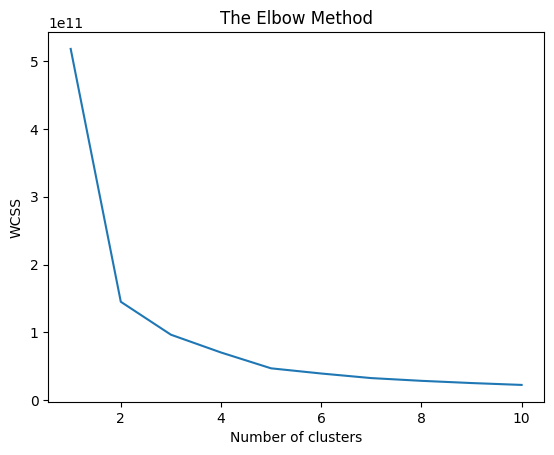

In [12]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
    kmeans.fit(A)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Training the K-Means model on the dataset

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42, n_init = 10)
y_kmeans = kmeans.fit_predict(A)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y_kmeans)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1]


**SPLITTING DATA**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
print(X_train)
print(X_train.shape)

[[0.0 0.0 0.0 ... 0.0 57.0 177.0]
 [0.0 0.0 0.0 ... 1.0 10933.0 49834.0]
 [0.0 0.0 0.0 ... 0.0 42.0 54106.0]
 ...
 [0.0 0.0 0.0 ... 0.0 441.0 2227.0]
 [0.0 0.0 0.0 ... 0.0 6008.0 100513.0]
 [0.0 0.0 0.0 ... 0.0 1957.0 8575.0]]
(336, 65)


In [17]:
print(X_test)

[[0.0 0.0 0.0 ... 0.0 203.0 1241.0]
 [0.0 0.0 0.0 ... 0.0 610.0 7020.0]
 [0.0 1.0 0.0 ... 0.0 11489.0 43722.0]
 ...
 [0.0 0.0 0.0 ... 0.0 12.0 161.0]
 [0.0 0.0 0.0 ... 0.0 2226.0 9316.0]
 [0.0 0.0 0.0 ... 2.0 2907.0 23091.0]]


In [18]:
print(y_train)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1
 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0
 0 1 0]


In [19]:
print(y_test)

[0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0]


In [20]:
print(X)

[[1.0 0.0 0.0 ... 0.0 0.0 323.0]
 [1.0 0.0 0.0 ... 0.0 0.0 328.0]
 [1.0 0.0 0.0 ... 0.0 0.0 318.0]
 ...
 [0.0 0.0 0.0 ... 8.0 2847.0 49096.0]
 [0.0 0.0 0.0 ... 0.0 3249.0 56614.0]
 [0.0 0.0 0.0 ... 12.0 4385.0 64482.0]]


In [21]:
# Featuring Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 37:] = sc.fit_transform(X_train[:, 37:])
X_test[:, 37:] = sc.transform(X_test[:, 37:])

In [22]:
print(X_train)

[[0.0 0.0 0.0 ... -0.24230949037789695 -0.6355423218652001
  -0.8087924772174302]
 [0.0 0.0 0.0 ... -0.13885842460029418 2.4298134415889105
  0.9351913193329178]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.6397700100273748
  1.0852265364999454]
 ...
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.5273135049135287
  -0.7367952405150878]
 [0.0 0.0 0.0 ... -0.24230949037789695 1.0417224950082289
  2.715068372424629]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.10003515465640915
  -0.5138496509607127]]


In [23]:
print(X_test)

[[0.0 0.0 0.0 ... -0.24230949037789695 -0.5943928237533667
  -0.7714241553387511]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.4796815516196941
  -0.5684621890446845]
 [0.0 1.0 0.0 ... -0.24230949037789695 2.5865197494668513
  0.7205341921501294]
 ...
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.6482253863517241
  -0.8093544068697411]
 [0.0 0.0 0.0 ... -0.24230949037789695 -0.02421861361474348
  -0.4878252839380611]
 [0.0 0.0 0.0 ... -0.035407358822691415 0.16771842894798633
  -0.0040389739015900565]]


**CRIME RATE ANALYSIS**

In [24]:
data.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,420.000000,420.000000,420.000000,420.00000,420.00000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2006.500000,958.435714,838.040476,106.22381,569.37381,0.061905,569.311905,849.659524,628.350000,221.309524,...,270.723810,8028.276190,217.147619,1078.940476,295.366667,2083.811905,2.123810,2385.390476,23340.069048,57001.557143
std,3.456169,1213.687365,1149.623253,253.86659,694.97765,0.392016,694.930776,1217.488114,966.279578,342.334028,...,357.828308,11603.262625,396.788651,1499.475571,698.715736,3236.534832,8.914278,3665.454858,29320.629427,66193.547043
min,2001.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,31.000000
25%,2003.750000,46.000000,32.000000,4.00000,29.00000,0.000000,29.000000,37.500000,15.500000,11.750000,...,18.000000,154.750000,1.000000,38.750000,2.000000,11.750000,0.000000,37.000000,693.750000,2408.500000
50%,2006.500000,463.500000,434.000000,29.00000,298.50000,0.000000,298.500000,295.500000,228.000000,81.500000,...,110.500000,1834.500000,45.000000,374.000000,28.000000,663.500000,0.000000,463.500000,10414.500000,30116.500000
75%,2009.250000,1461.000000,1302.250000,92.25000,936.00000,0.000000,935.250000,1195.500000,894.750000,287.000000,...,413.000000,11239.500000,273.500000,1662.000000,185.000000,2764.000000,0.000000,3025.000000,41774.750000,109178.500000
max,2012.000000,7601.000000,7964.000000,1616.00000,3425.00000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,...,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


**STATE VS TOTAL CRIME OVER 10 YEARS**

             STATE/UT  TOTAL IPC CRIMES
0       A & N ISLANDS              9102
1      ANDHRA PRADESH           2018981
2   ARUNACHAL PRADESH             27652
3               ASSAM            597764
4               BIHAR           1346293
5          CHANDIGARH             40807
6        CHHATTISGARH            561027
7        D & N HAVELI              4651
8         DAMAN & DIU              2948
9            DELHI UT            633174
10                GOA             32051
11            GUJARAT           1385775
12            HARYANA            595303
13   HIMACHAL PRADESH            154948
14    JAMMU & KASHMIR            259155
15          JHARKHAND            422351
16          KARNATAKA           1481063
17             KERALA           1437459
18        LAKSHADWEEP               743
19     MADHYA PRADESH           2413770
20        MAHARASHTRA           2273436
21            MANIPUR             35072
22          MEGHALAYA             25249
23            MIZORAM             26146


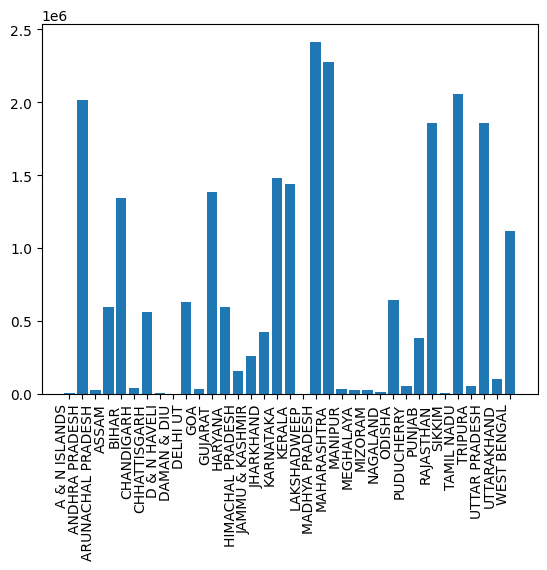

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sum_by_state = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['TOTAL IPC CRIMES']
print(df_sum_by_state)
fig, ax = plt.subplots()
plt.xticks(rotation = 90, ha ='right')
ax.bar(states, sum)
plt.show()

**TYPE OF CRIME V/S RATE OF THAT CRIME**

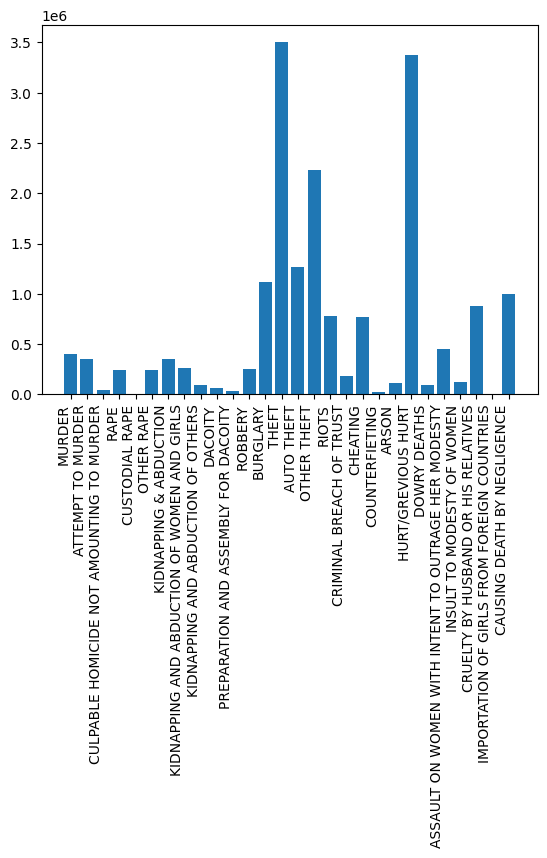

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


sum_column = data.sum(axis=0)
sum_col = sum_column
f = np.array(sum_col[2:30])
crimes = data.columns.values[2:30]

fig, ax = plt.subplots()
plt.xticks(rotation = 90, ha ='right')
ax.bar(crimes, f)

plt.show()

**PIE CHART OF CRIME RATE PER STATE**

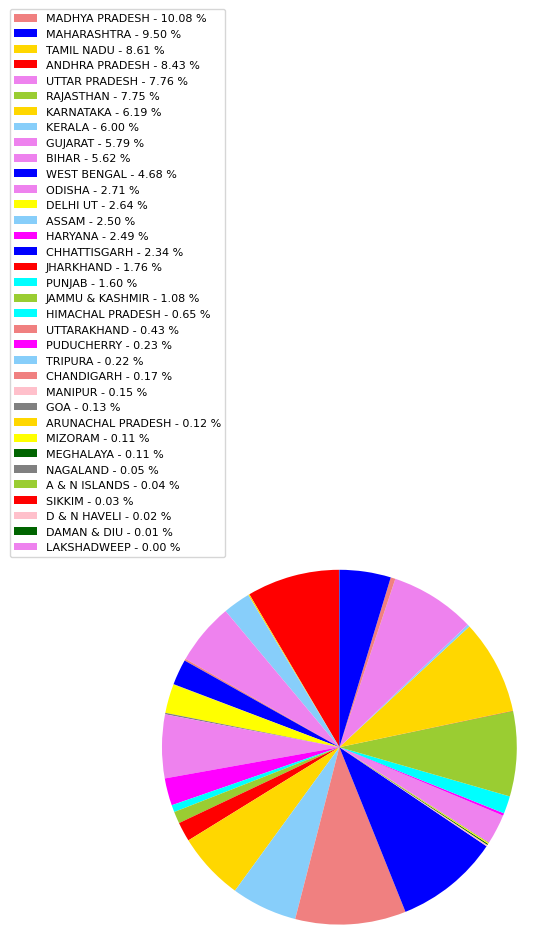

In [27]:
import seaborn as sns

df_sum_by_state = data.groupby('STATE/UT')['TOTAL IPC CRIMES'].sum().reset_index()
states = df_sum_by_state['STATE/UT']
sum = df_sum_by_state['TOTAL IPC CRIMES']

x = states
y = sum
colors = ['yellowgreen','red','gold','lightskyblue','violet','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower center', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

**SVM MODEL**

In [28]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]
[[60  1]
 [ 1 22]]


0.9761904761904762